In [1]:
# plot maps
from mpl_toolkits.basemap import Basemap,  maskoceans # cm, 
from matplotlib import colors
from pylab import *
import matplotlib.cm as cm

import pandas as pd
import os
%matplotlib inline

In [2]:
os.getenv('PATH')

'/home/share/unix_files/anaconda/v2.1/bin:/usr/local/install/cdo-1.6.3/bin:/usr/local/install/netcdf-4.3.2/bin:/usr/lib64/qt-3.3/bin:/home/users/nhempel/bin:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/bin/intel64:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/mpirt/bin/intel64:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/bin/intel64:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/bin/intel64_mic:/usr/local/install/intel-fcomp-2013/composer_xe_2013.2.146/debugger/gui/intel64:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/sbin'

In [3]:
# set up workspace

if 'obelix' in os.uname()[1] or 'asterix' in os.uname()[1]:
    env = '/home/estimr2/nhempelmann'
else: 
    env = os.getenv('HOME')

In [ ]:
# get required data

ukstpath = os.path.join(env+'/data/euclia/uk/SouthUKrainSTATIONS.txt')
frstpath = os.path.join(env+'/data/euclia/station_coords.csv')

# french stations:
frst = pd.read_csv(frstpath,
                   sep=',',
                   #names = ['NUM_POSTE','lat','lon']
                   usecols=[0,8,9],
                 #  skiprows = 1
                   )
# UK stations: 
uklon = np.array([-1.2625,-0.3586, -0.4748,-0.6750,0.1310,0.2850,-0.4500,0.4610,-0.1780,-0.3780,-1.8040,-1.3340,-1.1790,-0.5950])
uklat = np.array([51.7607, 51.8062, 51.3103, 50.7810, 52.1930, 50.7620, 51.2870, 51.0760, 51.5600, 51.4120, 51.2010, 51.0080, 50.6230, 52.0140])
NUM_POSTE = np.array(['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','HamptonWWks_711','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'])
# add the french station 
lon = np.append(uklon, frst.lon.div(10000).values)
lat = np.append(uklat, frst.lat.div(10000).values)
NUM_POSTE = np.append(NUM_POSTE, frst.NUM_POSTE.values)

In [45]:
c_southUK = [('Oxford_606',[-1.2625, 51.7607]),
       # ('Rothamsted_471',[-0.3586,51.8062]),
        ('Wisley_719',[-0.4748,51.3103]),
        ('BognorRegis_782',[-0.6750,50.7810]),
        ('CambridgeBG_454',[0.1310,52.1930]),
        ('Eastbourne_808',[0.2850,50.7620]),
        #('EastMalling_744',[-0.4500,51.2870]),
        #('Goodhurst_742',[0.4610,51.0760]),
        #('Hampstead_695',[-0.1780,51.5600]),
        ('HamptonWWks_711',[-0.3780,51.4120]),
        #('Larkhill_888',[-1.8040,51.2010]),
        ('OtterbourneWWks_855',[-1.3340,51.0080]),
#        ('WightShanklin_878',[-1.1790,50.6230]),
        ('Woburn_458',[-0.5950,52.0140])]

c_westFRA = [('PERROS-GUIREC', [-3.2823, 48.4933]),
          ('ROSTRENEN',[-3.1828, 48.1353]), 
          ('BRENNILIS',[-3.5107, 48.2137]),
          ('GUIPAVAS', [-4.2443, 48.2639]), 
          ('ILE-DE-BATZ', [-4.0043, 48.4447]),
          ('PLOGOFF',[-4.4355, 48.0220]),
          ('BLERUAIS',[-2.0727,48.0641]),
          ('ERBREE',[-1.0731,48.0556]),
          ('MEZIERES-SUR-COUESNON',[-1.2619,48.1831]),         
          ('AIGREFEUILLE-SUR-MAINE',[-1.2331,47.0359]),
          ('GUEMENE-PENFAO',[-1.4956,47.3759]),
          ('LA_HAIE-FOUASSIERE',[-1.2305,47.0943]),
          ('NOZAY',[-1.3637,47.3411]),
          ('PONTCHATEAU',[-2.0535,47.2635]),
          ('SAINT-PHILBERT-DE-GRAND-LIEU',[-1.3910,47.0145]), 
          ('ENGLESQUEVILLE-LA-PERCEE',[-0.5722 , 49.2312]), ]


In [5]:
# get the data 

rr = pd.read_csv(os.path.join(env+'/data/euclia/allstations.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0])

In [6]:
# generate the winter season values 

DJF = (rr[np.any([rr.index.month == 12, rr.index.month == 1, rr.index.month == 2], axis=0 )]).resample('M', how='sum')#.tshift(-1, freq='M')
wsum = DJF.resample('A', how='sum',  fill_method=None, closed={'right'}, convention = 'start',  kind=None, loffset=None, limit=None, base=0)

In [7]:
#wsum

In [ ]:
# rank the vaulues 
DJF55r = wsum[wsum.index.year >= 1955].rank(axis = 0, ascending=False ) # method='average', na_option='keep', ascending=False, pct=False)
# get the 2014 record value
w14 = DJF55r[DJF55r.index.year == 2014]

In [99]:
# sort appropriate to NUM_POSTE
z = np.zeros(len(w14.columns.values))
for name in w14.columns.values: 
    i = np.where(NUM_POSTE == name.replace('ID',''))
    # print i[0][0]
    z[i[0][0]] = w14[name].values

In [100]:
z

array([  1. ,   1. ,   1. ,   1. ,   6. ,   1. ,   1. ,   1. ,   1. ,
         1. ,   1. ,   1. ,   1. ,   2. ,  24. ,   2. ,  17. ,   2. ,
         2. ,  16.5,  20. ,  22. ,   2. ,   1. ,   1. ,   1. ,  18. ,
         1. ,   2. ,   3. ,   4. ,  13. ,   5. ,   1. ,   1. ,   2. ,
         1. ,   1. ,   2. ,   1. ,   1. ,   2. ,   7. ,   6. ,   5. ])

In [ ]:
obs = pd.read_csv(os.path.join(env+'/data/euclia/pr_obs.csv'),
#                names = ['Oxford_606','Rothamsted_471','Wisley_719','BognorRegis_782','CambridgeBG_454','Eastbourne_808','EastMalling_744','Goodhurst_742','Hampstead_695','Larkhill_888','OtterbourneWWks_855','WightShanklin_878','Woburn_458'],
                 # usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                 parse_dates = [0],
                 header=[0,1,2],
                 sep=',',
                 keep_date_col = True,
                 # na_values=-999,
                 index_col =[0]
                 )

In [20]:
obs_ss = obs[obs.index.year >= 1955].xs(['south_UK', 'west_FRA'], level=['region','region'], axis=1)# # method='average', na_option='keep', ascending=False, pct=False)
# get the 2014 record value
w14 = DJF55r[DJF55r.index.year == 2014]

In [36]:
obs_uk_r = obs[obs.index.year >= 1955].xs(['south_UK'], level=['region'], axis=1).rank(axis = 0, ascending=False )
obs_uk_r14 = obs_uk_r[obs_uk_r.index.year >= 2014]
obs_uk_r14

admin              southUK                                                 \
station    BognorRegis_782 CambridgeBG_454 Eastbourne_808 HamptonWWks_711   
Date                                                                        
2014-02-28               1               6              1               1   

admin                                                            
station    OtterbourneWWks_855 Oxford_606 Wisley_719 Woburn_458  
Date                                                             
2014-02-28                   1          1          1          2

In [37]:
obs_fra_r = obs[obs.index.year >= 1955].xs(['west_FRA'], level=['region'], axis=1).rank(axis = 0, ascending=False )
obs_fra_r14 = obs_fra_r[obs_fra_r.index.year >= 2014]
obs_fra_r14

admin                    Brittany                                           \
station    AIGREFEUILLE-SUR-MAINE BLERUAIS BRENNILIS ERBREE GUEMENE-PENFAO   
Date                                                                         
2014-02-28                      1        1         2      1              1   

admin                                                                     \
station    GUIPAVAS ILE-DE-BATZ LA_HAIE-FOUASSIERE MEZIERES-SUR-COUESNON   
Date                                                                       
2014-02-28        1           1                  2                     2   

admin                                                         \
station    NOZAY PERROS-GUIREC PLOGOFF PONTCHATEAU ROSTRENEN   
Date                                                           
2014-02-28     1             2       1           1         2   

admin                                                    default  
station    SAINT-PHILBERT-DE-GRAND-LIEU ENGLESQUEVILLE-LA-PERCEE  
Date                                                              
2014-02-28                            2                        2

In [91]:
obs_fra_r14.xs(['BLERUAIS'], level=['station'], axis=1).values[0]
key[0]

'Oxford_606'

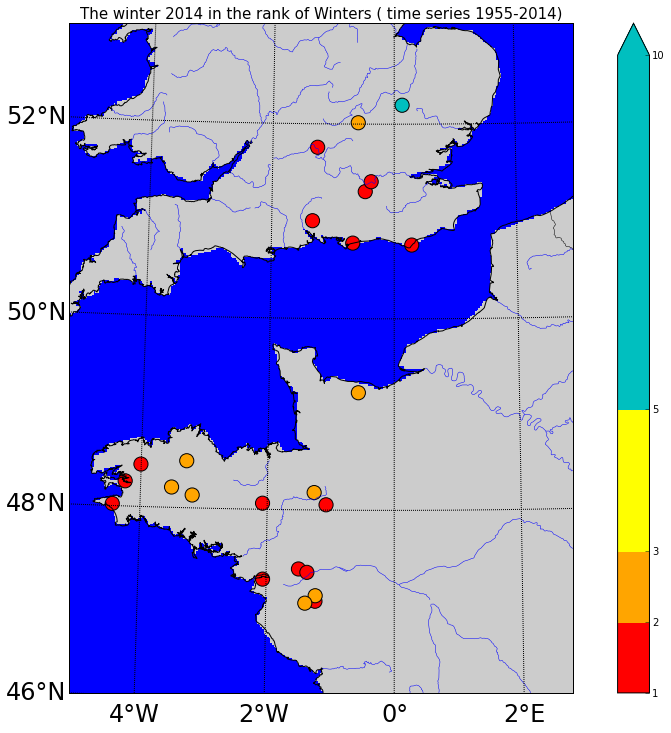

In [108]:
lons = []
lats= []
z = []
names = []
for  key in c_southUK:
    names.append( key[0] )
    lons.append(key[1][0])
    lats.append(key[1][1])
    z.append(obs_uk_r14.xs([key[0]], level=['station'], axis=1).values[0][0])
for  key in c_westFRA:
    names.append( key[0] )
    lons.append(key[1][0])
    lats.append(key[1][1])
    z.append(obs_fra_r14.xs([key[0]], level=['station'], axis=1).values[0][0])  
# prepare basemap
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

lat0=0
lon0=0
lllon=-5 #min(LON)
lllat=46 #min(LAT)
urlon=3  #max(LON)
urlat=53 #max(LON)
m = Basemap(projection='stere',lat_0=lat0,lon_0=lon0,
                        llcrnrlon=lllon,llcrnrlat=lllat,
                        urcrnrlon=urlon,urcrnrlat=urlat,
            resolution='h',area_thresh=1000.)
             
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(linewidth=0.5, linestyle='solid', color='b', antialiased=1, ax=None, zorder=None)
m.drawlsmask(land_color='0.8', ocean_color='b', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=1.25)

m.drawparallels(np.arange(30.,70.,2.), labels = [1, 0, 0, 0],fontsize=24)
m.drawmeridians(np.arange(-10.,50.,2.), labels = [0, 0, 0, 1],fontsize=24)

cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'c' ])
#cmap.set_over('0.25')
#cmap.set_under('0.75')
# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.

bounds = [1, 2, 3, 5, 10,]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cm = matplotlib.cm.get_cmap('RdYlBu')
# cmap = plt.cm.get_cmap('Set1')

ax1 = fig.add_subplot(111)
x, y = m(lons, lats)
ax1 = m.scatter(x, y, marker='o', c=z, cmap=cmap, norm=norm, s=200 ) #
plt.title('The winter 2014 in the rank of Winters ( time series 1955-2014)', fontsize=15 )
plt.colorbar(ax1, ticks=bounds, spacing='proportional', extend='max')

fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green' ])
#cmap.set_over('0.25')
#cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [1, 2, 3, 5, 10, 20]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cm = matplotlib.cm.get_cmap('RdYlBu')
# cmap = plt.cm.get_cmap('Set1')

ValueError: Color array must be two-dimensional

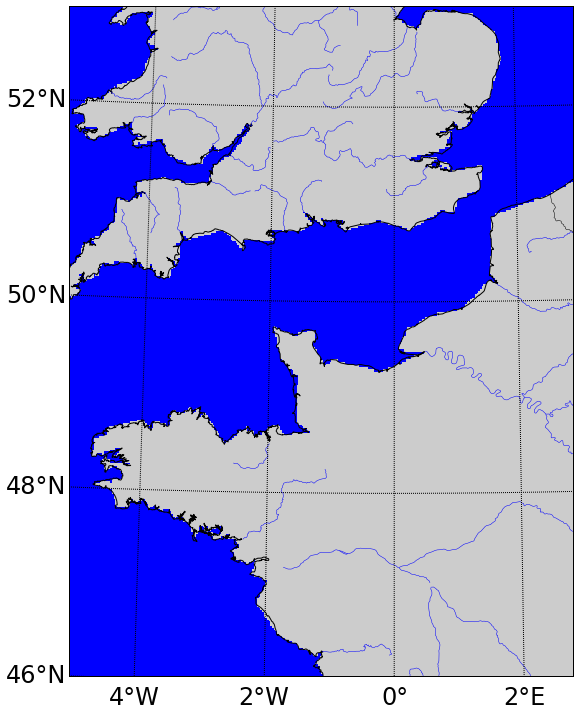

In [95]:
ax1 = fig.add_subplot(111)
x, y = m(lons, lats)
ax1 = m.scatter(x,y, marker='o', c=z, cmap=cmap, norm=norm,  s=200 )
plt.title('The winter 2014 in the rank of Winters ( time series 1955-2014)', fontsize=15 )
plt.colorbar(ax1, ticks=bounds, spacing='proportional', extend='max')
# plt.show()# plt.show()

<matplotlib.colorbar.Colorbar instance at 0x2b45b4af0950>

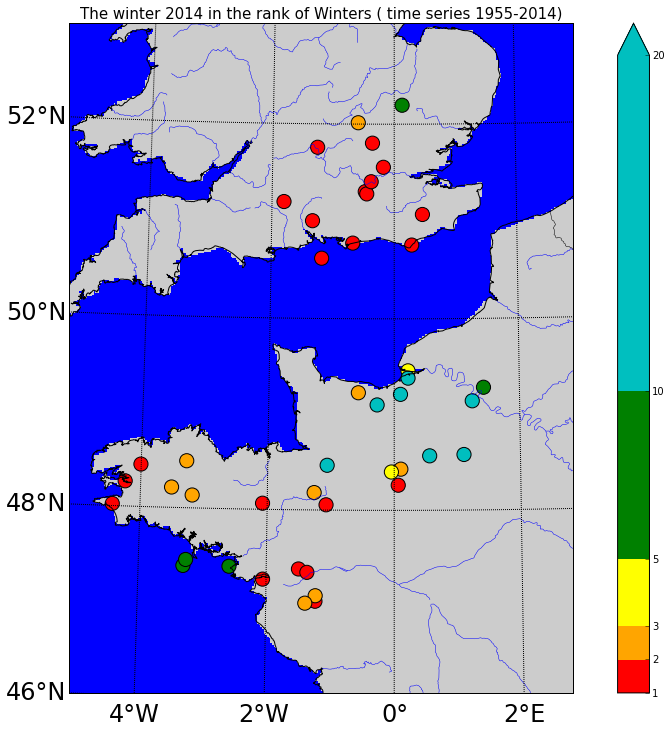

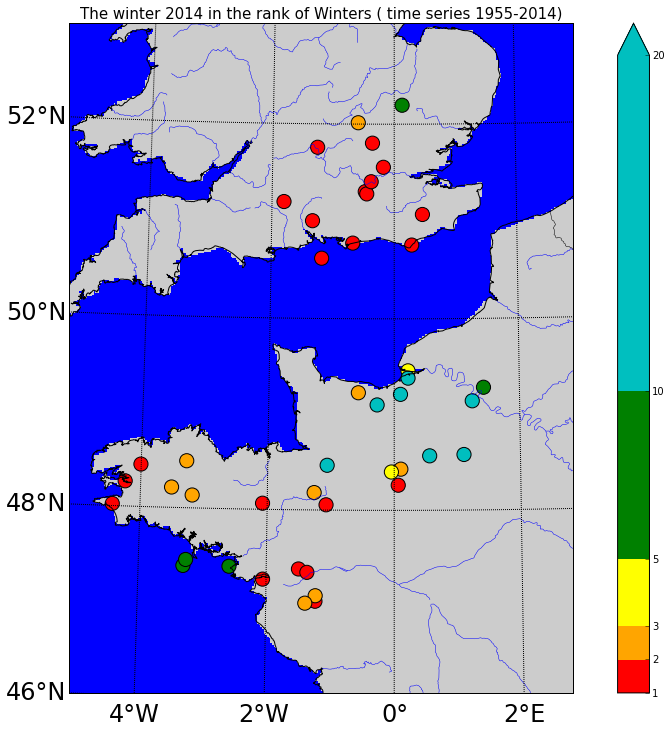

In [11]:
# prepare basemap
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

lat0=0
lon0=0
lllon=-5 #min(LON)
lllat=46 #min(LAT)
urlon=3  #max(LON)
urlat=53 #max(LON)
m = Basemap(projection='stere',lat_0=lat0,lon_0=lon0,
                        llcrnrlon=lllon,llcrnrlat=lllat,
                        urcrnrlon=urlon,urcrnrlat=urlat,
            resolution='h',area_thresh=1000.)
             
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(linewidth=0.5, linestyle='solid', color='b', antialiased=1, ax=None, zorder=None)
m.drawlsmask(land_color='0.8', ocean_color='b', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=1.25)

m.drawparallels(np.arange(30.,70.,2.), labels = [1, 0, 0, 0],fontsize=24)
m.drawmeridians(np.arange(-10.,50.,2.), labels = [0, 0, 0, 1],fontsize=24)

cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'c' ])

#cmap.set_over('0.25')
#cmap.set_under('0.75')
# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.

bounds = [1, 2, 3, 5, 10, 20]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cm = matplotlib.cm.get_cmap('RdYlBu')
# cmap = plt.cm.get_cmap('Set1')

ax1 = fig.add_subplot(111)
x, y = m(lon, lat)
ax1 = m.scatter(x,y, marker='o', c=z, cmap=cmap, norm=norm,  s=200 )
plt.title('The winter 2014 in the rank of Winters ( time series 1955-2014)', fontsize=15 )
plt.colorbar(ax1, ticks=bounds, spacing='proportional', extend='max')
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

lat0=0
lon0=0
lllon=-5 #min(LON)
lllat=46 #min(LAT)
urlon=3  #max(LON)
urlat=53 #max(LON)
m = Basemap(projection='stere',lat_0=lat0,lon_0=lon0,
                        llcrnrlon=lllon,llcrnrlat=lllat,
                        urcrnrlon=urlon,urcrnrlat=urlat,
            resolution='h',area_thresh=1000.)
             
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(linewidth=0.5, linestyle='solid', color='b', antialiased=1, ax=None, zorder=None)
m.drawlsmask(land_color='0.8', ocean_color='b', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=1.25)

m.drawparallels(np.arange(30.,70.,2.), labels = [1, 0, 0, 0],fontsize=24)
m.drawmeridians(np.arange(-10.,50.,2.), labels = [0, 0, 0, 1],fontsize=24)

cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'c' ])
#cmap.set_over('0.25')
#cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
bounds = [1, 2, 3, 5, 10, 20]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cm = matplotlib.cm.get_cmap('RdYlBu')
# cmap = plt.cm.get_cmap('Set1')

ax1 = fig.add_subplot(111)
x, y = m(lon, lat)
ax1 = m.scatter(x,y, marker='o', c=z, cmap=cmap, norm=norm,  s=200 )
plt.title('The winter 2014 in the rank of Winters ( time series 1955-2014)', fontsize=15 )
plt.colorbar(ax1, ticks=bounds, spacing='proportional', extend='max')
# plt.show()# plt.show()

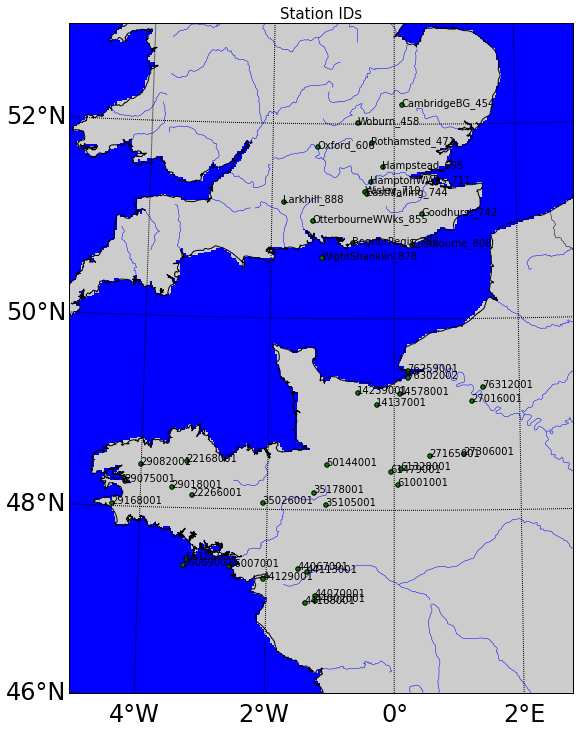

In [12]:
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

lat0=0
lon0=0
lllon=-5 #min(LON)
lllat=46 #min(LAT)
urlon=3  #max(LON)
urlat=53 #max(LON)
m = Basemap(projection='stere',lat_0=lat0,lon_0=lon0,
                        llcrnrlon=lllon,llcrnrlat=lllat,
                        urcrnrlon=urlon,urcrnrlat=urlat,
            resolution='h',area_thresh=1000.)
             
# draw coastlines, state and country boundaries, edge of map.
m.drawcoastlines()
m.drawstates()
m.drawcountries()
m.drawrivers(linewidth=0.5, linestyle='solid', color='b', antialiased=1, ax=None, zorder=None)
m.drawlsmask(land_color='0.8', ocean_color='b', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=1.25)

m.drawparallels(np.arange(30.,70.,2.), labels = [1, 0, 0, 0],fontsize=24)
m.drawmeridians(np.arange(-10.,50.,2.), labels = [0, 0, 0, 1],fontsize=24)

# cmap = mpl.colors.ListedColormap(['red', 'orange', 'yellow', 'green', 'c' ])
# cmap.set_over('0.25')
# cmap.set_under('0.75')

# If a ListedColormap is used, the length of the bounds array must be
# one greater than the length of the color list.  The bounds must be
# monotonically increasing.
#bounds = [1, 2, 3, 5, 10, 20]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
# cm = matplotlib.cm.get_cmap('RdYlBu')
# cmap = plt.cm.get_cmap('Set1')

ax1 = fig.add_subplot(111)
x, y = m(lon, lat)

ax1 = fig.add_subplot(111)
x, y = m(lon, lat)

ax1 = m.scatter(x,y, marker='o', c='g', s=20, label='Stations')

plt.title('Station IDs', fontsize=15 )

for label, xpt, ypt in zip(NUM_POSTE, x, y):
    plt.text(xpt, ypt, label)

SyntaxError: invalid syntax (<ipython-input-13-368395d00ef6>, line 1)